# Import libraries

In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Loading Dataset

In [4]:
data = pd.read_csv(r"C:\Users\swapn\Downloads\hotel_booking.csv\hotel_booking.csv")

# Exploratory Data Analysis and Data Cleaning

In [41]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [34]:
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [35]:
data.shape

(119390, 36)

In [36]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [38]:
# dropping columns as  I think I donot need for the analysis
data.drop(['name', 'email' , 'phone-number' , 'credit_card'], axis=1, inplace=True) 


In [15]:
# converting reservation_status_date into date time format
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

In [16]:
data.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [17]:
for col in data.describe(include = 'object').columns:
    print(col)
    print(data[col].unique())
    print('-'*50)


hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [18]:
#checking null values
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [19]:
round(data.isnull().sum()/data.shape[0] *100 , 2).sort_values(ascending = False)

company                           94.31
agent                             13.69
country                            0.41
hotel                              0.00
previous_cancellations             0.00
reservation_status                 0.00
total_of_special_requests          0.00
required_car_parking_spaces        0.00
adr                                0.00
customer_type                      0.00
days_in_waiting_list               0.00
deposit_type                       0.00
booking_changes                    0.00
assigned_room_type                 0.00
reserved_room_type                 0.00
previous_bookings_not_canceled     0.00
is_repeated_guest                  0.00
is_canceled                        0.00
distribution_channel               0.00
market_segment                     0.00
meal                               0.00
babies                             0.00
children                           0.00
adults                             0.00
stays_in_week_nights               0.00


In [15]:
# handeling missing values, as we can see the company and agent column has more percentage of missing values, so I am droppng it.
data.drop(['company', 'agent'], axis = 1, inplace = True)
data.dropna(inplace = True)

In [16]:
data.isnull().sum()


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [17]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<AxesSubplot:>

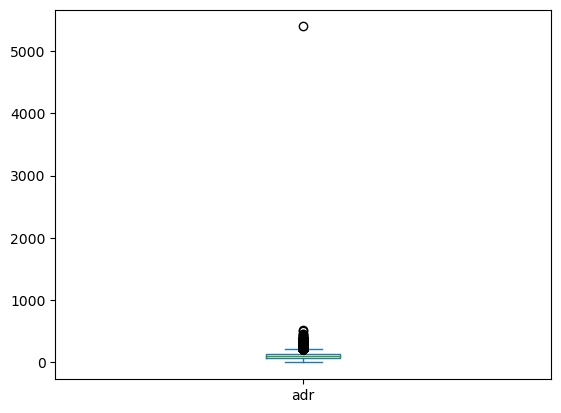

In [19]:
data['adr'].plot(kind = 'box')

In [20]:
#As we can see there is  outlier which is so high, I am removing it.
data = data[data['adr']<5000]

# Data Analysis and Visualization

In [23]:
canceled_percent = data['is_canceled'].value_counts(normalize = True)
canceled_percent

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64

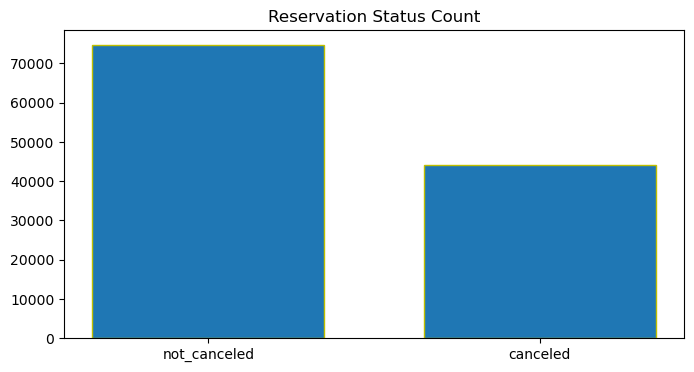

In [21]:
# plot the graph
plt.figure(figsize=(8,4))
plt.title('Reservation Status Count')
plt.bar(['not_canceled', 'canceled'],data['is_canceled'].value_counts(), edgecolor = 'y', width = 0.7)
plt.show()


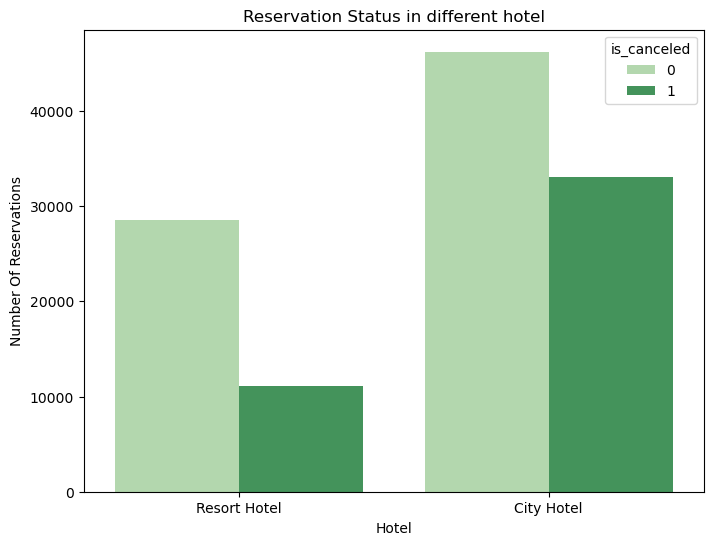

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='hotel', hue='is_canceled', palette = 'Greens')
plt.title('Reservation Status in different hotel')
plt.xlabel('Hotel')
plt.ylabel('Number Of Reservations')
plt.legend(title='is_canceled')
plt.show()

In [23]:
resort_hotel = data[data['hotel'] =='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [24]:
city_hotel = data[data['hotel'] =='City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

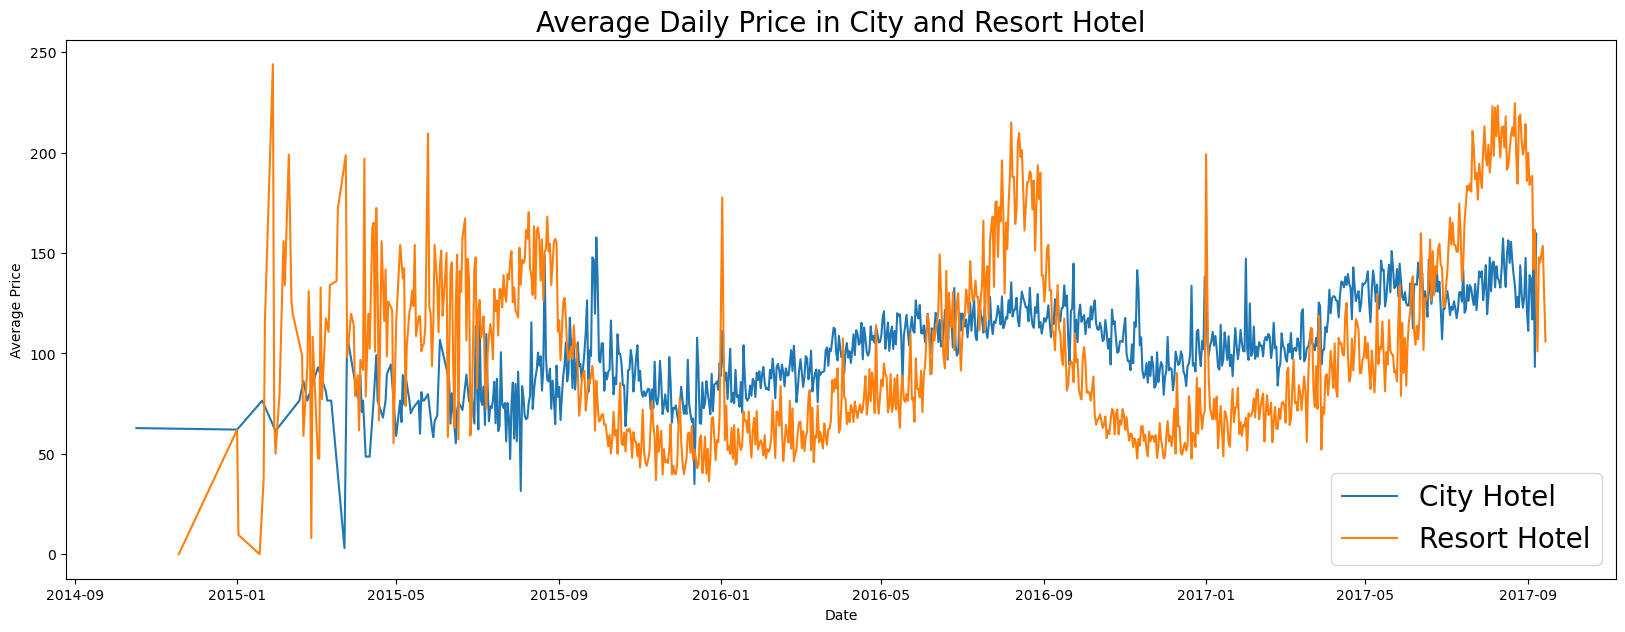

In [26]:
# Is there any effect of price on cancelation for hotels
grouped_data = data.groupby(['reservation_status_date', 'hotel'])['adr'].mean().reset_index()

plt.figure(figsize=(20, 7))


for hotel, group_data in grouped_data.groupby('hotel'):
    plt.plot(group_data['reservation_status_date'], group_data['adr'], label = hotel, linewidth = 1.5)
   

# Add labels and legend

plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend(fontsize = 20)
plt.title('Average Daily Price in City and Resort Hotel', fontsize = 20)
plt.show()

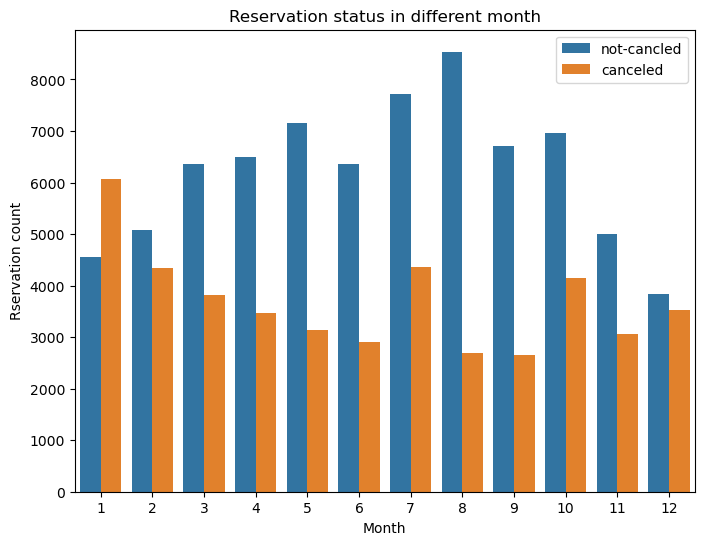

In [27]:
# adding column month to observe  the cancelation for monthwise 
data['month'] = data['reservation_status_date'].dt.month
plt.figure(figsize=(8,6))
sns.countplot(x = 'month', hue = 'is_canceled', data= data)
plt.title('Reservation status in different month')
plt.xlabel('Month')
plt.ylabel('Rservation count')
plt.legend(['not-cancled', 'canceled'])
plt.show()

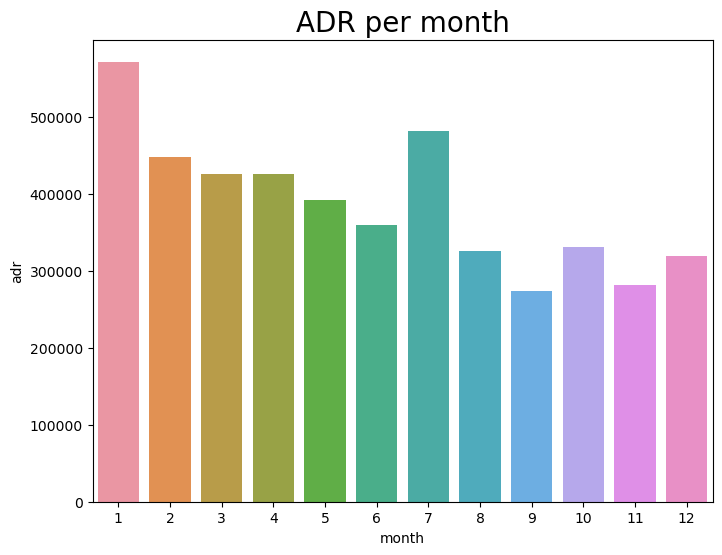

In [28]:
plt.figure(figsize=(8,6))
plt.title('ADR per month', fontsize = 20)
sns.barplot('month' , 'adr', data = data[data['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.show()                                         
                                         

In [29]:
canceled_data = data[data['reservation_status'] == 'Canceled']
top_10_countries = canceled_data['country'].value_counts()[:10]
top_10_countries

PRT    26751
GBR     2412
ESP     2145
FRA     1902
ITA     1315
DEU     1205
IRL      825
BRA      799
USA      472
BEL      464
Name: country, dtype: int64

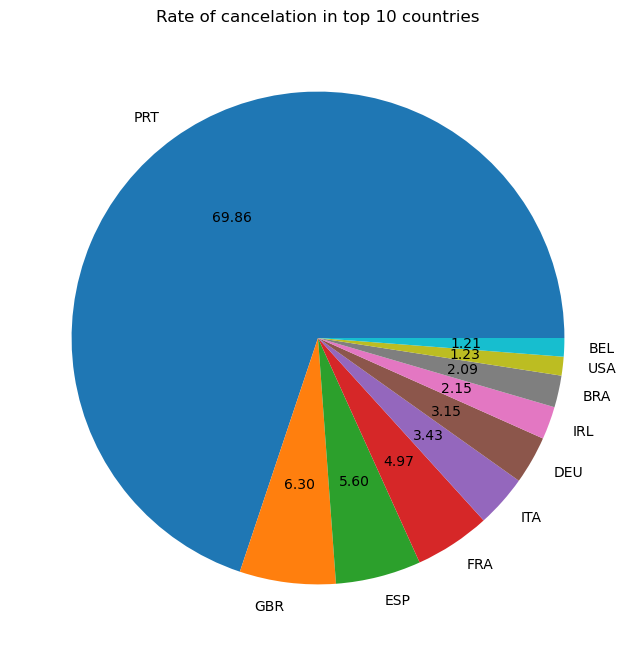

In [30]:
plt.figure( figsize = (8,8))
top_10_countries = canceled_data['country'].value_counts(normalize = True)[:10]
plt.title('Rate of cancelation in top 10 countries')
plt.pie(top_10_countries, autopct = '%.2f', labels = top_10_countries.index)
plt.show()

In [31]:
data['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [32]:
data['market_segment'].value_counts(normalize= True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [33]:
canceled_data['market_segment'].value_counts(normalize= True)

Online TA        0.469091
Groups           0.279937
Offline TA/TO    0.187338
Direct           0.039791
Corporate        0.021072
Complementary    0.001816
Aviation         0.000955
Name: market_segment, dtype: float64

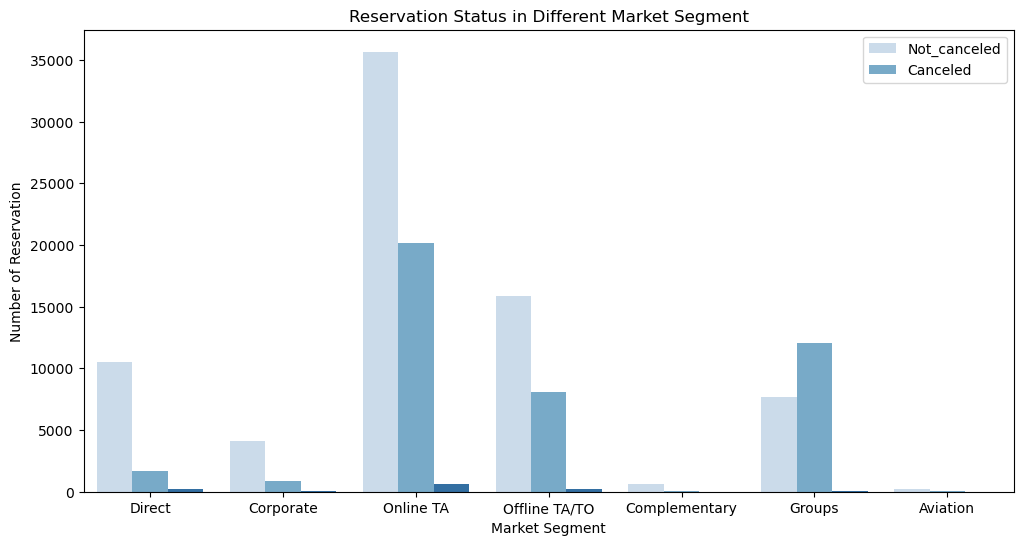

In [34]:
plt.figure( figsize = (12,6))
sns.countplot(x = 'market_segment' , hue = 'reservation_status', data = data, palette = 'Blues')
plt.title('Reservation Status in Different Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Number of Reservation')
plt.legend(['Not_canceled', 'Canceled'])
plt.show()

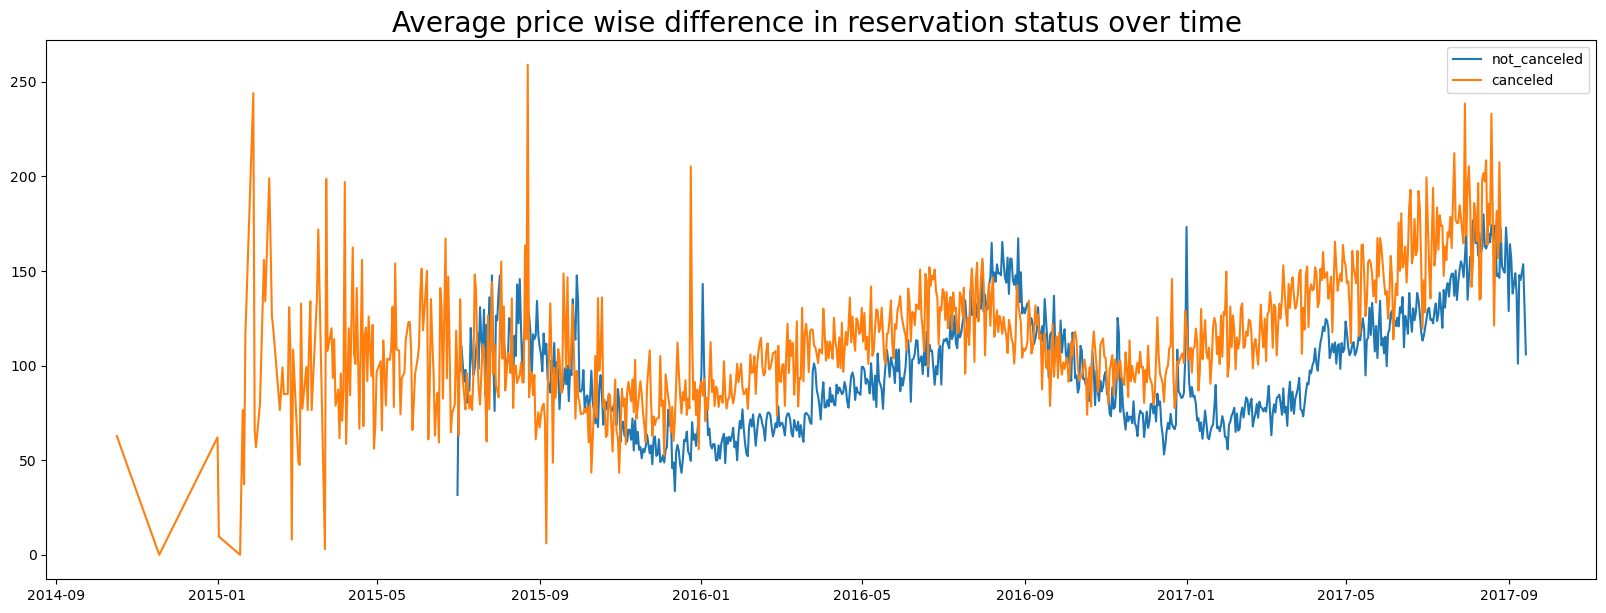

In [35]:
canceled_data_price = canceled_data.groupby('reservation_status_date')[['adr']].mean()
canceled_data_price.reset_index(inplace = True)
canceled_data_price.sort_values('reservation_status_date', inplace = True)

not_canceled_data = data[data['is_canceled'] == 0]
not_canceled_data_price = not_canceled_data.groupby('reservation_status_date')[['adr']].mean()
not_canceled_data_price.reset_index(inplace = True)
not_canceled_data_price.sort_values('reservation_status_date', inplace = True)

plt.figure( figsize = (20,7))
plt.title('Average price wise difference in reservation status over time ', fontsize = 20)
plt.plot(not_canceled_data_price['reservation_status_date'], not_canceled_data_price['adr'], label = 'not_canceled')
plt.plot(canceled_data_price['reservation_status_date'], canceled_data_price['adr'], label = 'canceled')
plt.legend()

In [36]:
canceled_data_price = canceled_data_price[(canceled_data_price['reservation_status_date']> '2016') & (canceled_data_price['reservation_status_date'] < '2017-09')] 
not_canceled_data_price = not_canceled_data_price[(not_canceled_data_price['reservation_status_date']> '2016')& (not_canceled_data_price['reservation_status_date'] < '2017-09')]

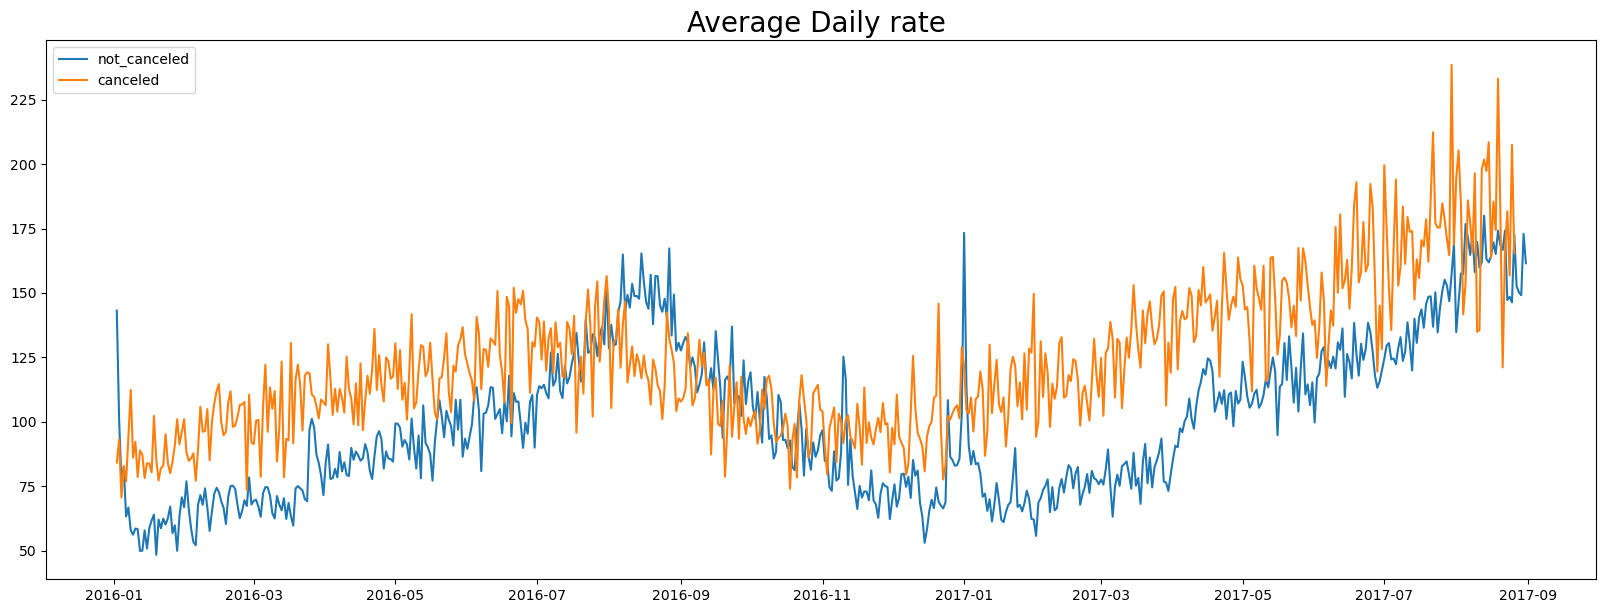

In [37]:
plt.figure( figsize = (20,7))
plt.title('Average Daily rate ', fontsize = 20)
plt.plot(not_canceled_data_price['reservation_status_date'], not_canceled_data_price['adr'], label = 'not_canceled')
plt.plot(canceled_data_price['reservation_status_date'], canceled_data_price['adr'], label = 'canceled')
plt.legend()

In [20]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

In [21]:
data_mon = data.groupby(['hotel', 'arrival_date_month'])['adr'].mean().reset_index()
data_mon['arrival_date_month'] = pd.Categorical(data_mon['arrival_date_month'], categories=months, ordered=True)
data_mon.sort_values('arrival_date_month', inplace=True)

In [22]:
data_mon

,hotel,arrival_date_month,adr
4,City Hotel,January,82.628986
16,Resort Hotel,January,49.461883
3,City Hotel,February,85.088278
15,Resort Hotel,February,55.171930
7,City Hotel,March,92.643116
19,Resort Hotel,March,57.520147
0,City Hotel,April,111.251838
12,Resort Hotel,April,77.849496
20,Resort Hotel,May,78.758134
8,City Hotel,May,121.638560


Text(0.5, 1.0, 'Average Daily rate by months')

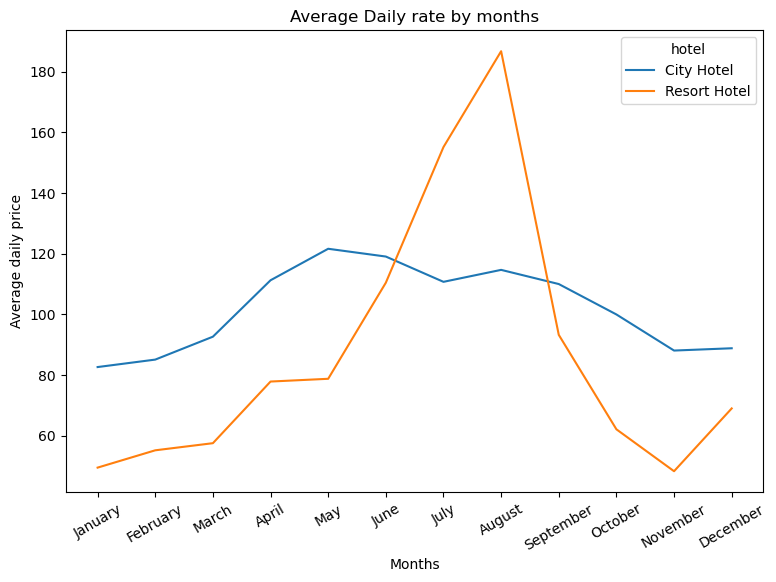

In [23]:
plt.figure(figsize=(9,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data=data_mon)
plt.ylabel("Average daily price")
plt.xlabel("Months")
p = plt.xticks(rotation=30)
plt.title("Average Daily rate by months")

Text(0.5, 1.0, 'Daily rate by customer type')

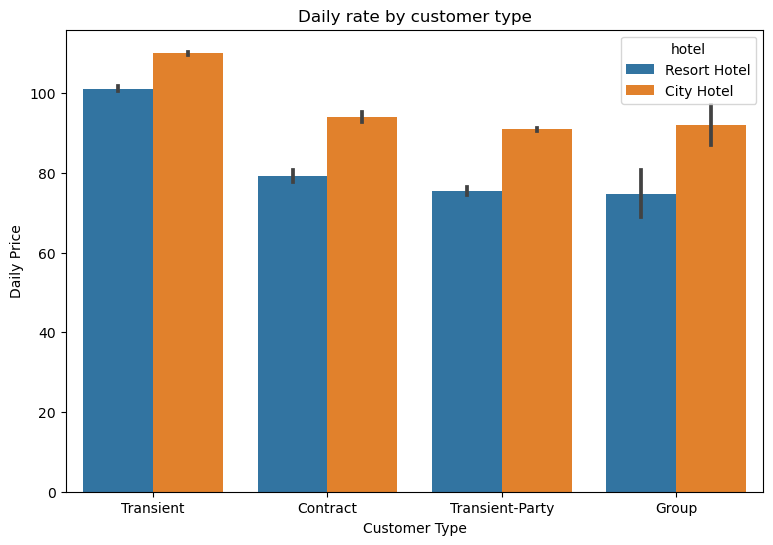

In [24]:
plt.figure(figsize=(9,6))
sns.barplot(x='customer_type', y='adr', hue='hotel', data=data)
plt.ylabel("Daily Price")
plt.xlabel("Customer Type")
plt.title("Daily rate by customer type")

Text(0.5, 1.0, 'Days in advanced of booking the hotel')

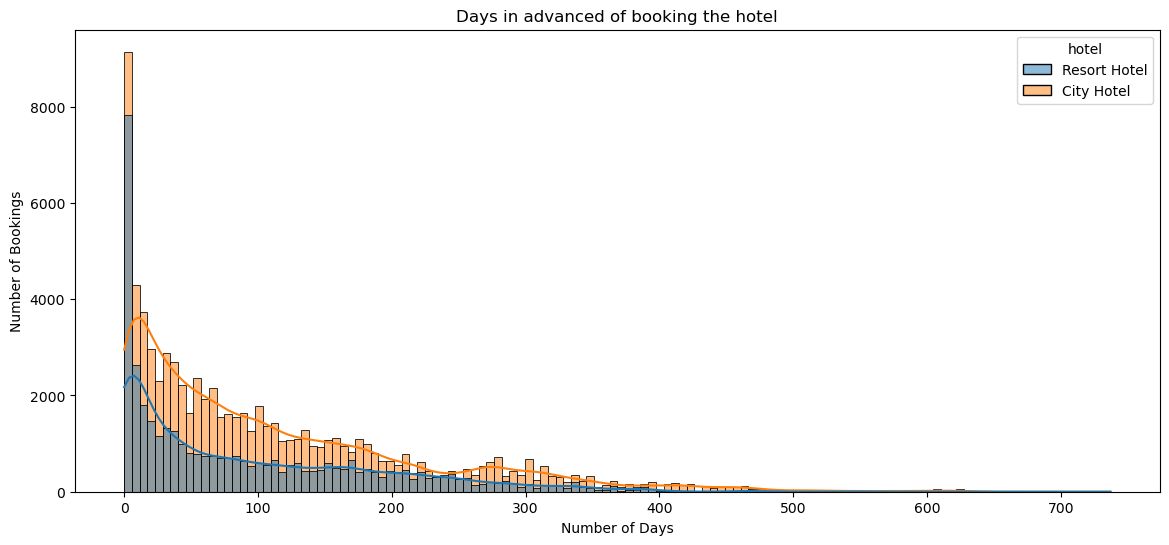

In [28]:
plt.figure(figsize=(14,6))
sns.histplot(x='lead_time', hue='hotel', data=data, kde=True)
plt.xlabel("Number of Days")
plt.ylabel("Number of Bookings")
plt.title("Days in advanced of booking the hotel")

As expected most bookings are done within 100 days of check-in date to hotel.

Text(0.5, 1.0, 'Cancellations by repeated guests')

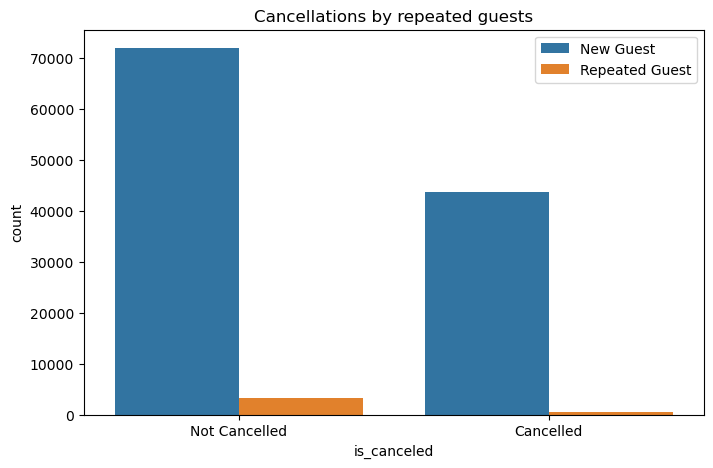

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x = "is_canceled", hue = 'is_repeated_guest', data = data)
plt.legend(['New Guest', 'Repeated Guest'])
plt.xticks(ticks=[0,1], labels=['Not Cancelled', 'Cancelled'])
plt.title("Cancellations by repeated guests")

We observe that repeated guests cancels their bookings less often than new guests.

In [46]:
data.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [6]:
hotel_arrival = data[data['is_canceled'] == 0]

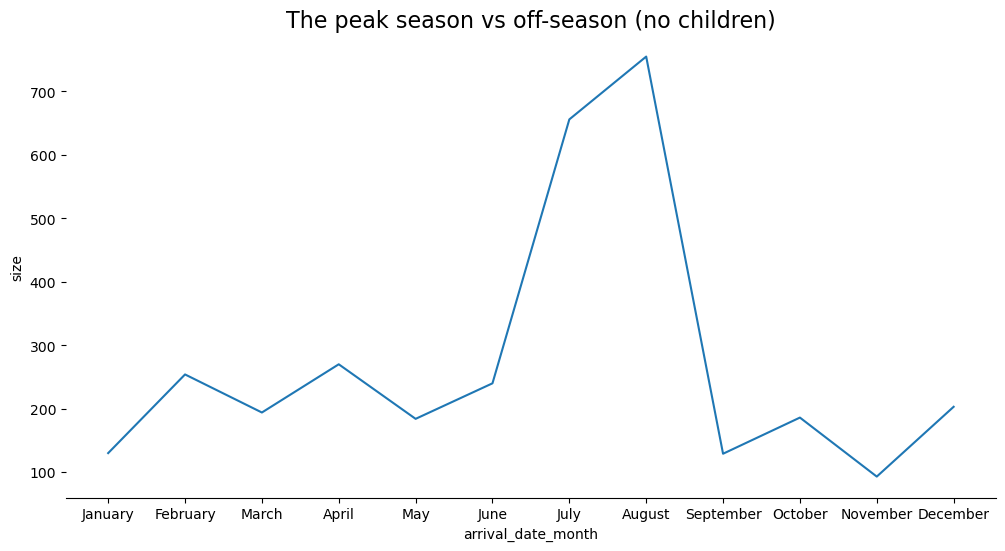

In [8]:
# Filter and group the data
no_children_month = hotel_arrival[hotel_arrival['children'] == 1].groupby(['arrival_date_month'], as_index=False).size()

# Convert 'arrival_date_month' to a categorical type with the correct order
months_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
no_children_month['arrival_date_month'] = pd.Categorical(no_children_month['arrival_date_month'], categories=months_order, ordered=True)

# Sort the data by 'arrival_date_month'
no_children_month = no_children_month.sort_values('arrival_date_month')

# Plot the data
plt.figure(figsize=(12,6))
sns.lineplot(data=no_children_month, x='arrival_date_month', y='size')
plt.title('The peak season vs off-season (no children)', fontsize=16)
sns.despine(left=True)
plt.show()


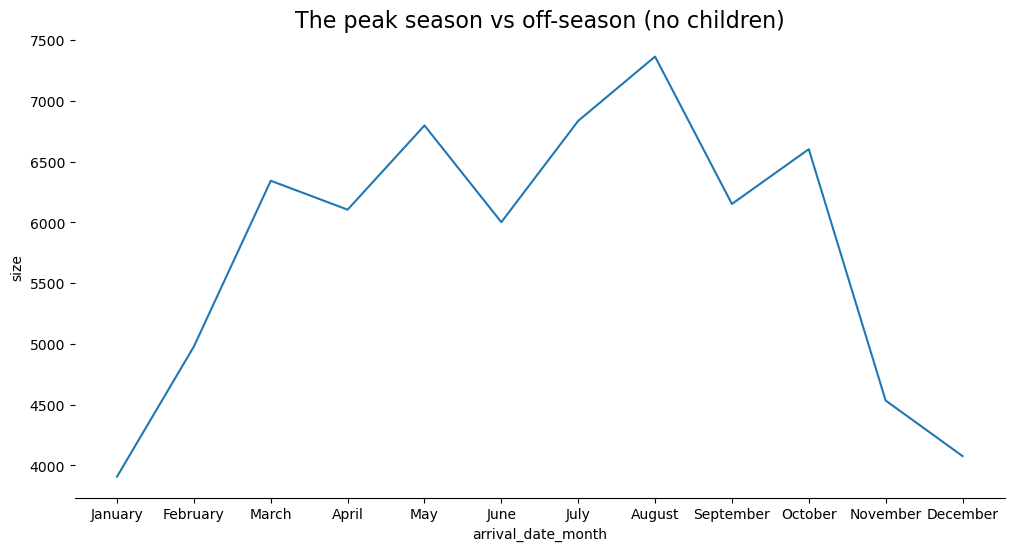

In [9]:
# Filter and group the data
no_children_month = hotel_arrival[hotel_arrival['children'] == 0].groupby(['arrival_date_month'], as_index=False).size()

# Convert 'arrival_date_month' to a categorical type with the correct order
months_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
no_children_month['arrival_date_month'] = pd.Categorical(no_children_month['arrival_date_month'], categories=months_order, ordered=True)

# Sort the data by 'arrival_date_month'
no_children_month = no_children_month.sort_values('arrival_date_month')

# Plot the data
plt.figure(figsize=(12,6))
sns.lineplot(data=no_children_month, x='arrival_date_month', y='size')
plt.title('The peak season vs off-season (no children)', fontsize=16)
sns.despine(left=True)
plt.show()


Observations:

1.Tourists who travel with no children are active between Feb and Nov.
2.Family visitors tend to travel in the school holiday season (Jun-Sep). 

In [18]:
new_df = data.copy()
new_df["total_nights"] = new_df['stays_in_weekend_nights'] + new_df['stays_in_week_nights']
new_df['total_children'] = new_df['children'] + new_df['babies']
new_df['total_members'] = new_df['total_children'] + new_df['adults']
new_df['money_per_person']   = new_df['adr'] * new_df['total_nights'] / new_df['total_members']


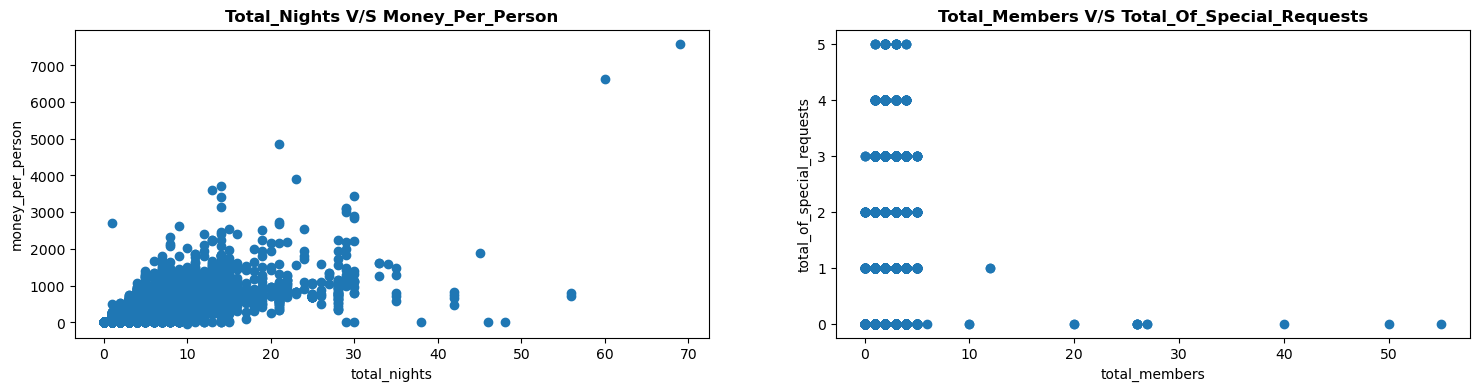

In [19]:
# To visualize optimal length of stay
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
plt.scatter(data=new_df,x= 'total_nights',y='money_per_person')
plt.title('total_nights v/s money_per_person'.title(),weight='bold')
plt.xlabel('total_nights')
plt.ylabel('money_per_person')

# To visualize relation between special request and total members arrived
plt.subplot(1,2,2)
plt.scatter(data=new_df,x= 'total_members',y='total_of_special_requests')
plt.title('total_members v/s total_of_special_requests'.title(),weight='bold')
plt.xlabel('total_members')
plt.ylabel('total_of_special_requests')
plt.show()

1.3 Nights seems economical for stay.
2.Number of Special requests seems have very less related with total members. So we can simply take the average of it to get the number of special requests.

In [23]:
# dropping the columns since we merged both the columns as total_children

new_df.drop(['children','babies'],axis = 1, inplace = True)

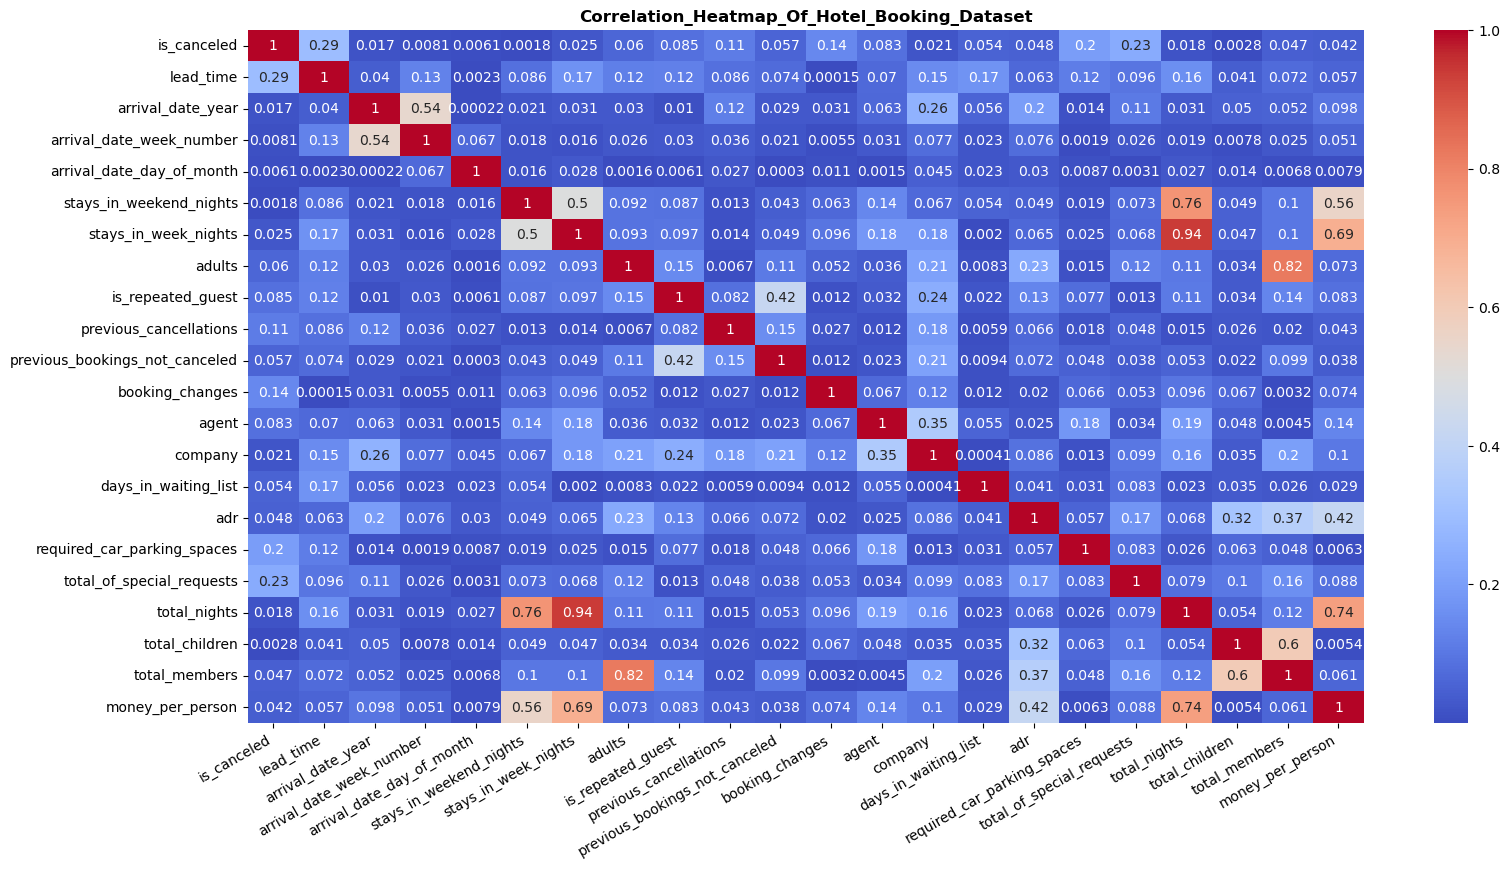

In [25]:
plt.figure(figsize=(18,9))
plot = sns.heatmap(abs(new_df.replace(['Yes','No'],[1,0]).corr()), annot=True, cmap='coolwarm')
plt.title('Correlation_Heatmap_Of_Hotel_Booking_Dataset', weight='bold')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

1.Total special requests depends more on total members arrived. 2.Average daily revenue depends more on total special requests and total members as compared to other variables.

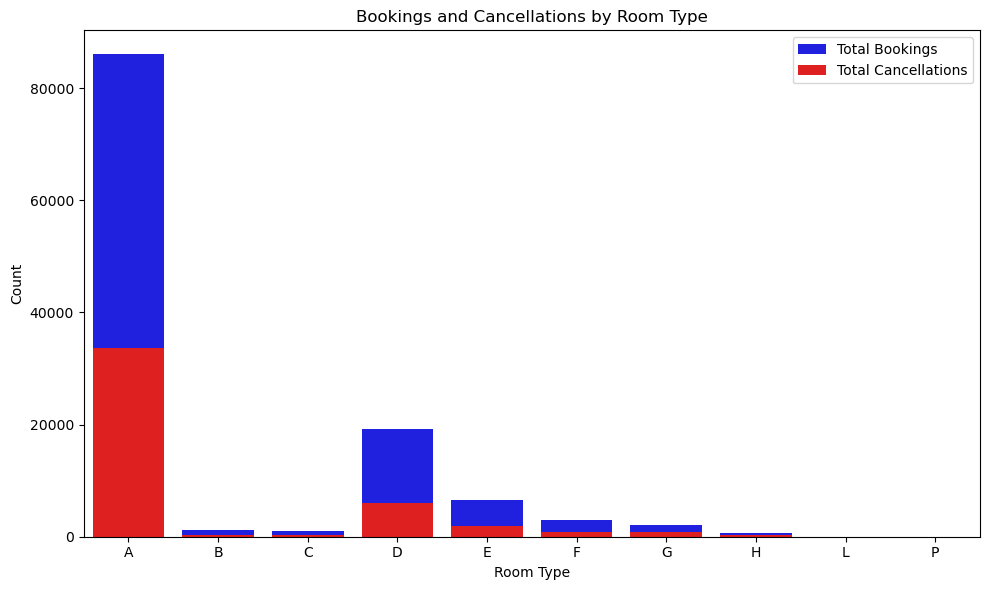

In [5]:
# Assuming hotel_data is a pandas DataFrame
room_type_data = data.groupby('reserved_room_type').agg(
    total_bookings=pd.NamedAgg(column='is_canceled', aggfunc='size'),
    total_cancellations=pd.NamedAgg(column='is_canceled', aggfunc='sum')
).reset_index()

# Setting up the visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=room_type_data, x='reserved_room_type', y='total_bookings', color='blue', label='Total Bookings')
sns.barplot(data=room_type_data, x='reserved_room_type', y='total_cancellations', color='red', label='Total Cancellations')
plt.title('Bookings and Cancellations by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
data['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [7]:
data['deposit_type'].groupby(data['is_canceled']).value_counts()

is_canceled  deposit_type
0            No Deposit      74947
             Refundable        126
             Non Refund         93
1            No Deposit      29694
             Non Refund      14494
             Refundable         36
Name: deposit_type, dtype: int64

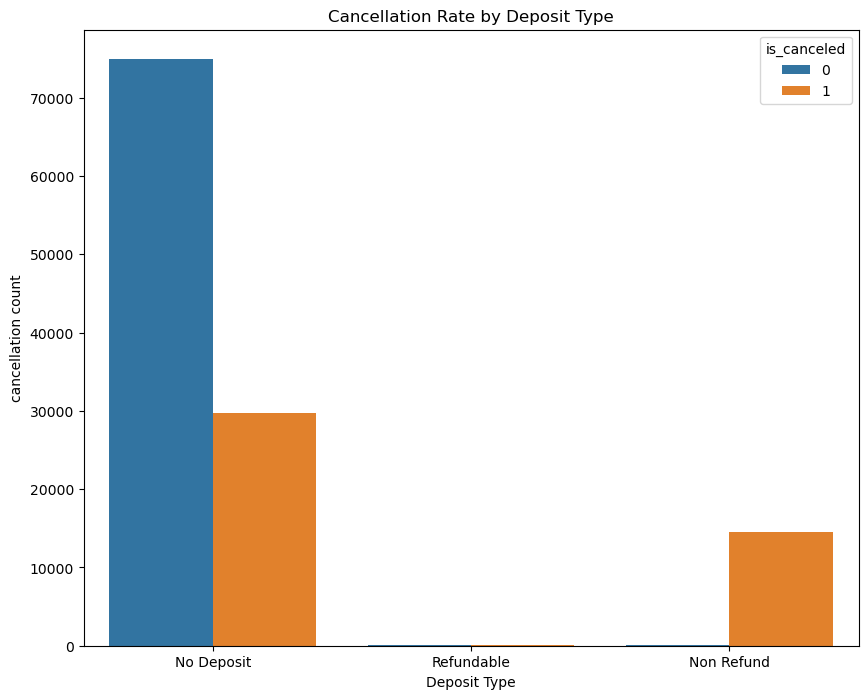

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(data = data, x = 'deposit_type',hue ='is_canceled')
plt.title('Cancellation Rate by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('cancellation count')
plt.show()

In [11]:
data['customer_type'].groupby(data['is_canceled']).value_counts()

is_canceled  customer_type  
0            Transient          53099
             Transient-Party    18735
             Contract            2814
             Group                518
1            Transient          36514
             Transient-Party     6389
             Contract            1262
             Group                 59
Name: customer_type, dtype: int64

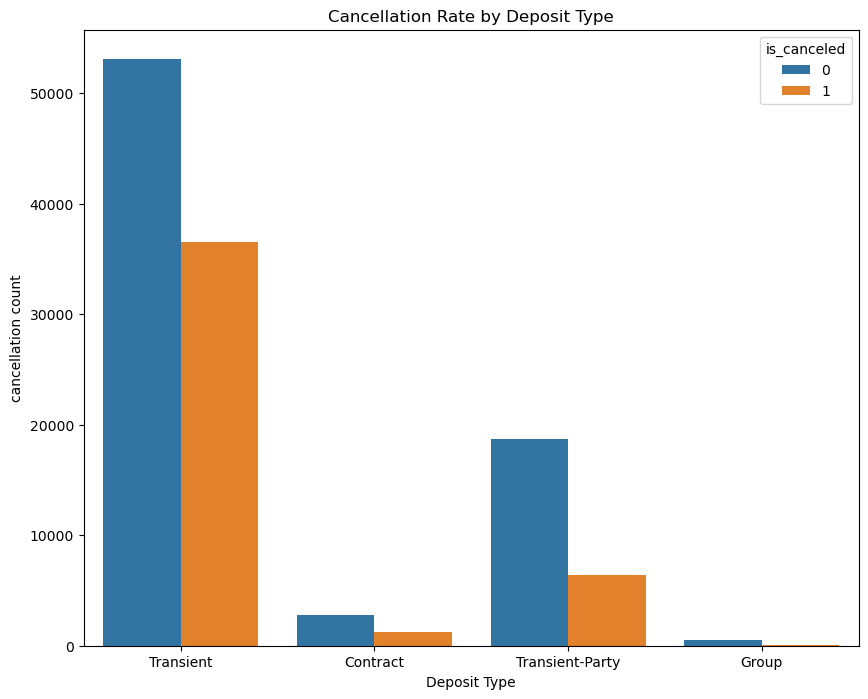

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(data = data, x = 'customer_type',hue ='is_canceled')
plt.title('Cancellation Rate by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('cancellation count')
plt.show()

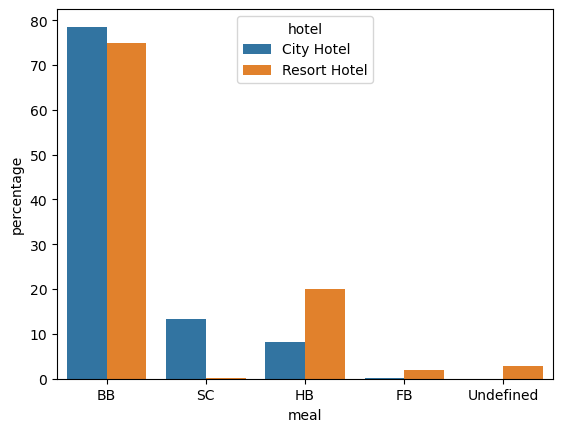

In [13]:
meal_data =data.groupby('hotel')['meal'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()
sns.barplot(x='meal',y='percentage',data=meal_data,hue='hotel')
plt.show()